In [42]:
import numpy as np
import matplotlib.pyplot as plt


In [43]:
def kappa_fn(x):
    return np.exp(-x / 10) - np.exp(-x / 2)

def calc_activation(inputs, weights, time_point):
    activation = 0.0

    for i in range(n_inputs):
        # integrate over the input function with kappa_fn
        channel_input = 0.0
        for spike in inputs[i]:
            channel_input += kappa_fn(spike)
        activation += weights[i] * channel_input

    return activation

def get_sample_inputs(max_num_spikes, start_time, end_time):
    # Create an array of spike times for each input neuron
    # Each neuron can fire up to max_num_spikes times between start_time and end_time
    sample_input = []
    for _ in range(n_inputs):
        num_spikes = np.random.randint(1, max_num_spikes + 1)
        spike_times = np.random.uniform(start_time, end_time, num_spikes)
        sample_input.append(np.sort(spike_times))
    return sample_input


n_inputs = 4
threshold = 4
start_time = 0
end_time = 500
max_num_spikes = 4

sample_inputs = get_sample_inputs(max_num_spikes, start_time, end_time)

weights = np.random.uniform(-1, 1, n_inputs)

# calculation
activation = calc_activation(sample_inputs, weights)
activation

np.float64(0.011769231423074912)

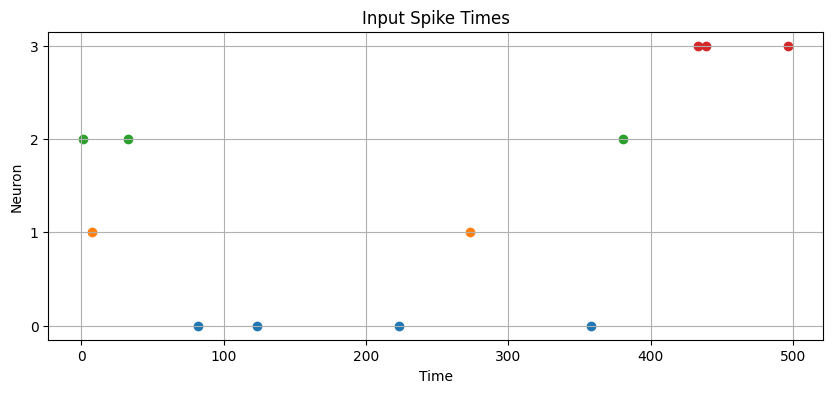

In [44]:
# Create scatter plot of spike times
plt.figure(figsize=(10,4))
for i, spikes in enumerate(sample_input):
    plt.scatter(spikes, [i]*len(spikes), label=f'Neuron {i}')
plt.yticks(range(len(sample_input)))
plt.xlabel('Time')
plt.ylabel('Neuron')
plt.title('Input Spike Times')
plt.grid(True)
plt.show()


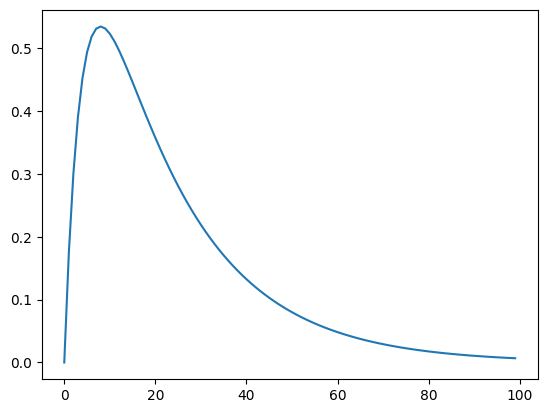

In [45]:
time = np.linspace(0, 50, 100)
plt.plot(kappa_fn(time))
